### Лабораторная работа 4

In [17]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from subprocess import call

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

import numpy as np
from sklearn.metrics import roc_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from itertools import product
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import (LinearRegression, BayesianRidge,
                                  Lasso, Ridge, ElasticNet, Lars)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import warnings

warnings.filterwarnings('ignore')

##### Выберем нужные данные из второй и третей лабораторной

2 лабораторная:

In [18]:
sample_len = 20000
df_train = pd.read_csv('./classif/train.csv')
df_train_2 = df_train.sample(n=sample_len, replace=False, random_state=42)
df_train_2.drop("id", axis=1, inplace=True)
num_cols = ["Age", "Driving_License", "Previously_Insured", "Region_Code",
            "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
qual_cols = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
res_col = "Response"
all_cols = num_cols + qual_cols

for name in qual_cols:
    df_train_2[name] = LabelEncoder().fit_transform(df_train_2[[name]])
df_train_2[all_cols] = MinMaxScaler().fit_transform(df_train_2[all_cols])

x2 = df_train_2[all_cols]
y2 = df_train_2[res_col]

df_train_2.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
46429,0.0,0.061538,1.0,0.576923,1.0,0.5,0.0,0.068835,0.932099,0.930796,0
143349,0.0,0.769231,1.0,0.538462,1.0,0.0,1.0,0.129108,0.154321,0.733564,0
196132,1.0,0.630769,1.0,0.538462,1.0,0.0,0.0,0.166912,0.154321,0.155709,0
5066,0.0,0.061538,1.0,0.076923,1.0,0.5,0.0,0.044100,0.932099,0.103806,0
211368,0.0,0.261538,1.0,0.269231,1.0,0.0,0.0,0.102890,0.932099,0.508651,0
144277,1.0,0.123077,1.0,0.076923,1.0,0.5,0.0,0.064235,0.932099,0.401384,0
102084,1.0,0.569231,1.0,0.961538,0.0,0.0,1.0,0.138536,0.759259,0.134948,0
105877,1.0,0.384615,1.0,0.153846,0.0,0.0,1.0,0.072954,0.018519,0.615917,1
175371,1.0,0.338462,1.0,0.557692,0.0,0.0,1.0,0.000000,0.154321,0.093426,1
166965,0.0,0.153846,1.0,0.538462,0.0,0.0,1.0,0.120218,0.759259,0.823529,0


3 лабораторная:

In [19]:
df_train_3 = pd.read_csv('./regression/train.csv')
df_train_3.drop('id', axis=1, inplace=True)
corr_matrix = df_train_3.corr()
target = 'Цена'
cors = {}
for f in df_train_3.columns:
    cors[f] = df_train_3[target].corr(df_train_3[f])
threshold = 0.29
weakly_correlated = [f for f, corr in cors.items() if abs(corr) < threshold]
df_train_3.drop(weakly_correlated, axis=1, inplace=True)

features = df_train_3.drop('Цена', axis=1)
corr_matrix = features.corr()

high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr_features.add(
                (corr_matrix.columns[i], corr_matrix.columns[j]))

price_corr = df_train_3.corr()['Цена']
to_drop = set()
for feat1, feat2 in high_corr_features:
    if abs(price_corr[feat1]) < abs(price_corr[feat2]):
        to_drop.add(feat1)
    else:
        to_drop.add(feat2)

df_train_3.drop(to_drop, axis=1, inplace=True)

x3 = df_train_3.loc[:, df_train_3.columns != 'Цена']
y3 = df_train_3['Цена']
df_train_3.head(10)

,Общая.площадь,Раздельный.санузел,Лифт,Мусоропровод,Стоматология.1000,Остановка.1000,Одежда..1000,Бар.1000,Цена
0,46.0,0,0,0,7,11,2,2,2350000.0
1,44.6,0,0,0,5,8,3,1,1799000.0
2,53.0,0,1,1,8,13,4,3,2800000.0
3,64.0,0,0,0,15,16,31,28,3970000.0
4,33.3,0,0,1,2,2,1,0,1880000.0
5,46.0,0,0,0,16,18,38,9,2400000.0
6,45.0,0,1,1,15,8,8,4,2870000.0
7,54.5,1,1,1,7,17,11,2,2700000.0
8,86.0,0,1,1,27,11,16,12,3200000.0
9,42.0,0,0,0,9,3,22,2,2560000.0


##### Построим дерево решений и визуализируем его

## Классификация

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}
Оценка: 0.8707170017133947


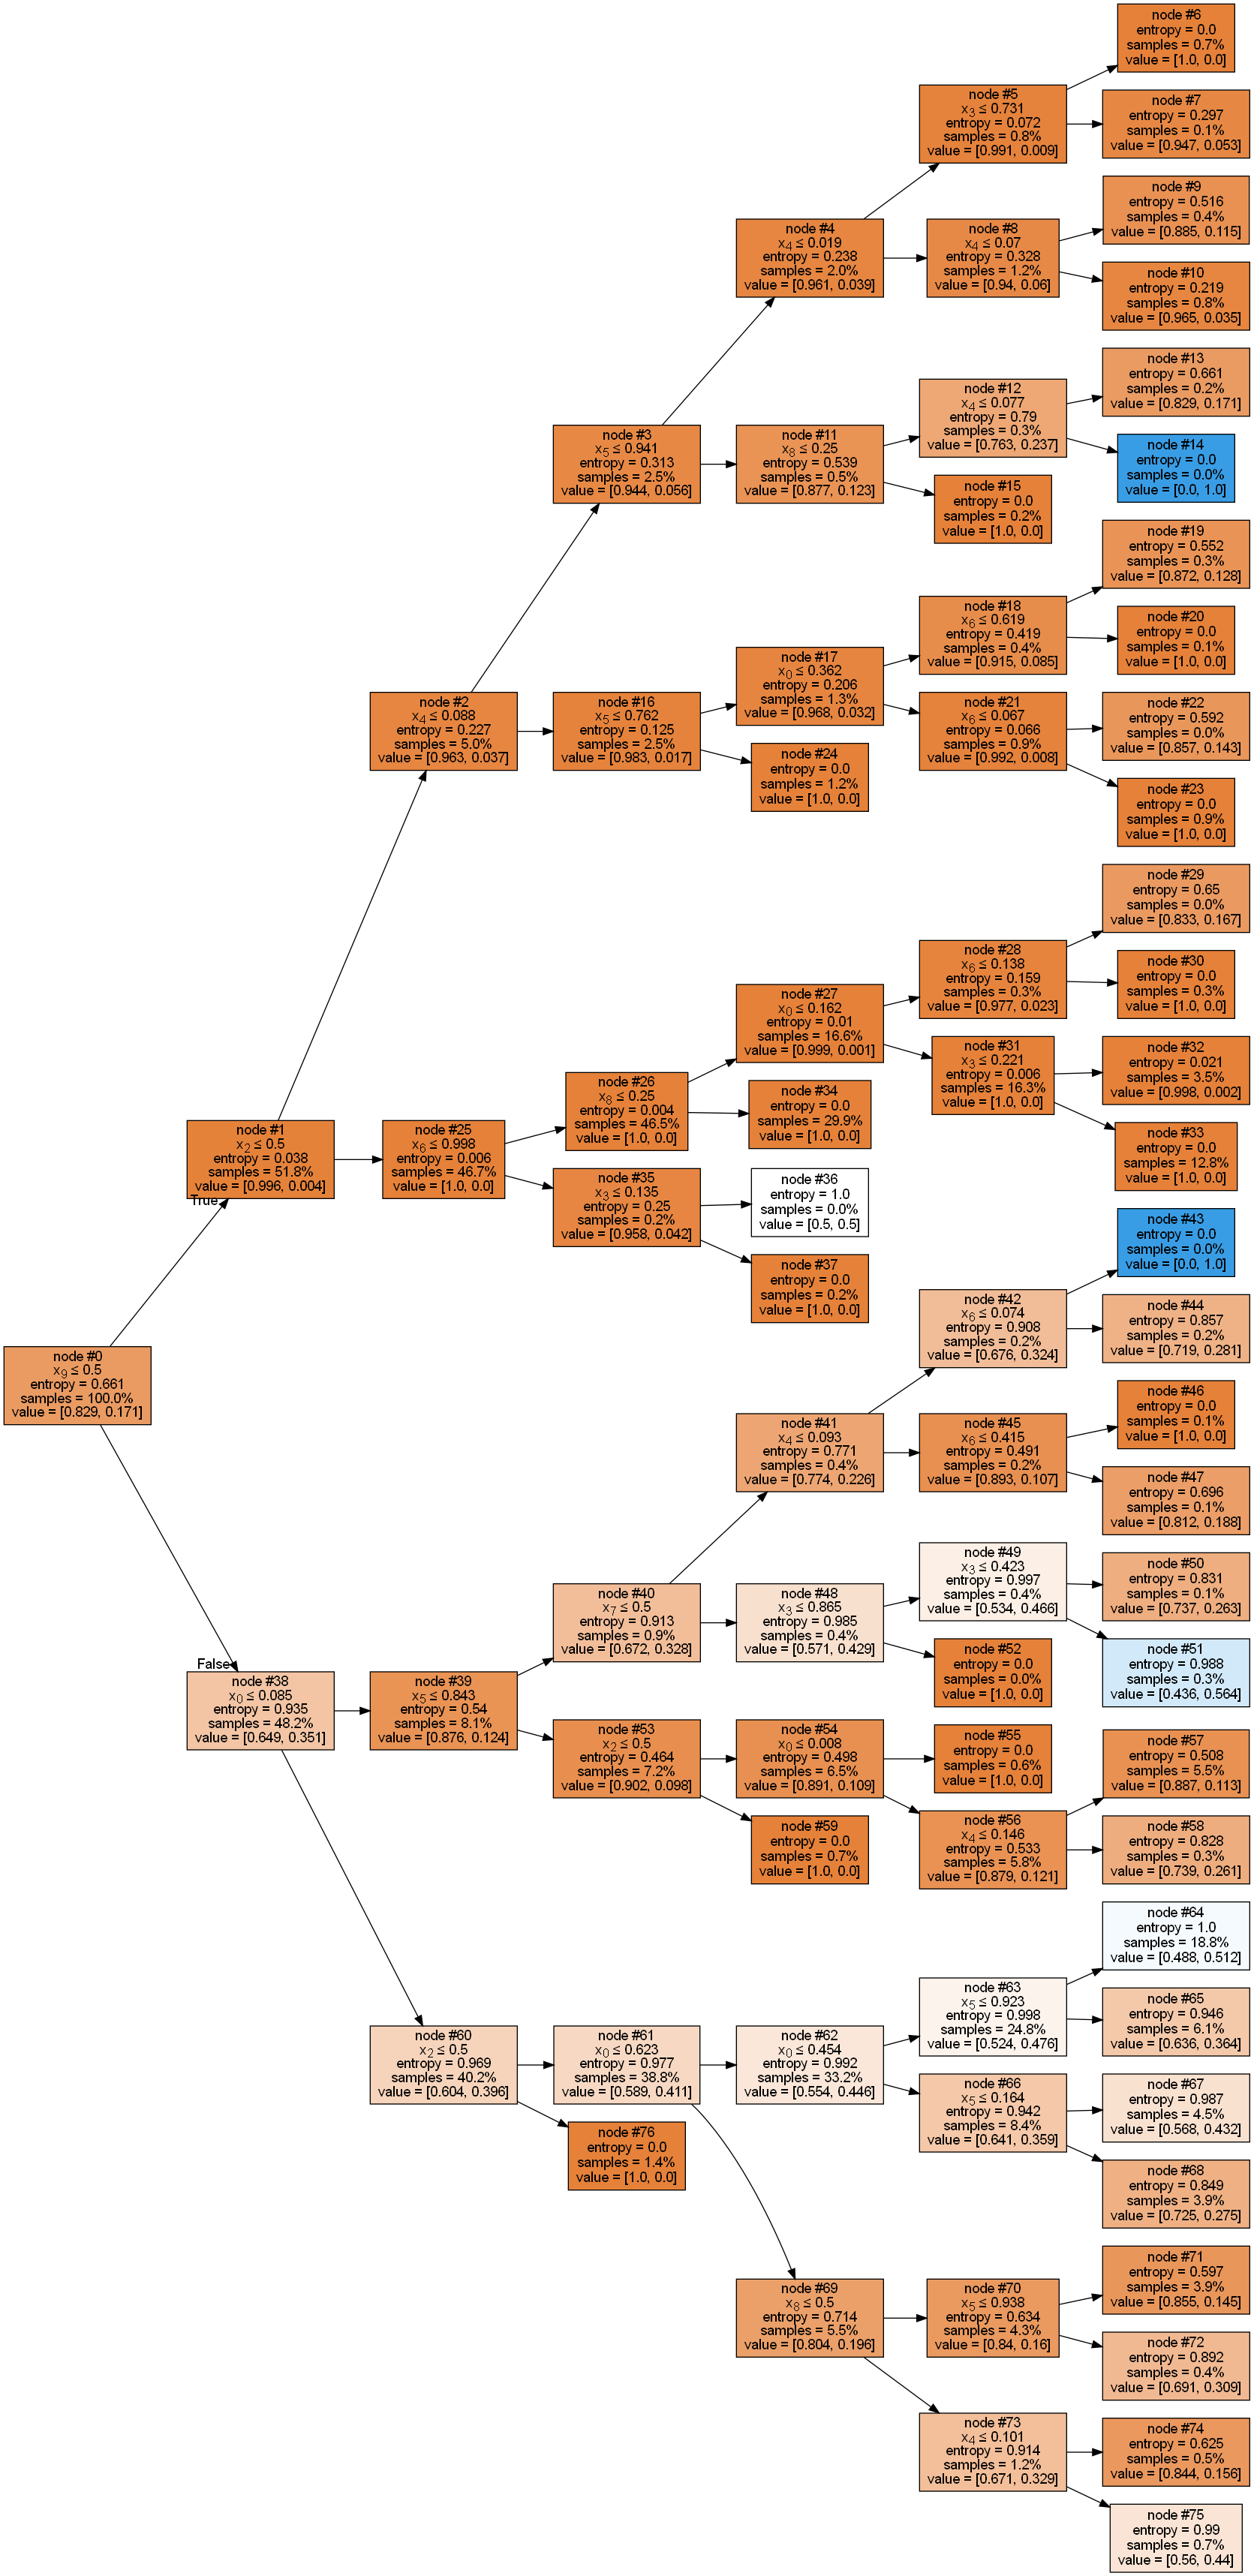

In [20]:
c_tree = DecisionTreeClassifier()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3,
                                                        random_state=7)
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid = GridSearchCV(c_tree, params)
grid.fit(x_train2, y_train2)
y_pred2 = grid.predict_proba(x_test2)[:, 1]
roc_score = roc_auc_score(y_test2, y_pred2)
print(f'Лучшие параметры: {grid.best_params_}\n'
      f'Оценка: {roc_score}')

# Строим дерево
export_graphviz(grid.best_estimator_, out_file='c_tree.dot',
                class_names=None, label='all', filled=True, impurity=True,
                node_ids=True,
                proportion=True, rotate=True,
                special_characters=True)

call(['dot', '-Tpng', 'c_tree.dot', '-o', 'c_tree.png'])
Image('c_tree.png')

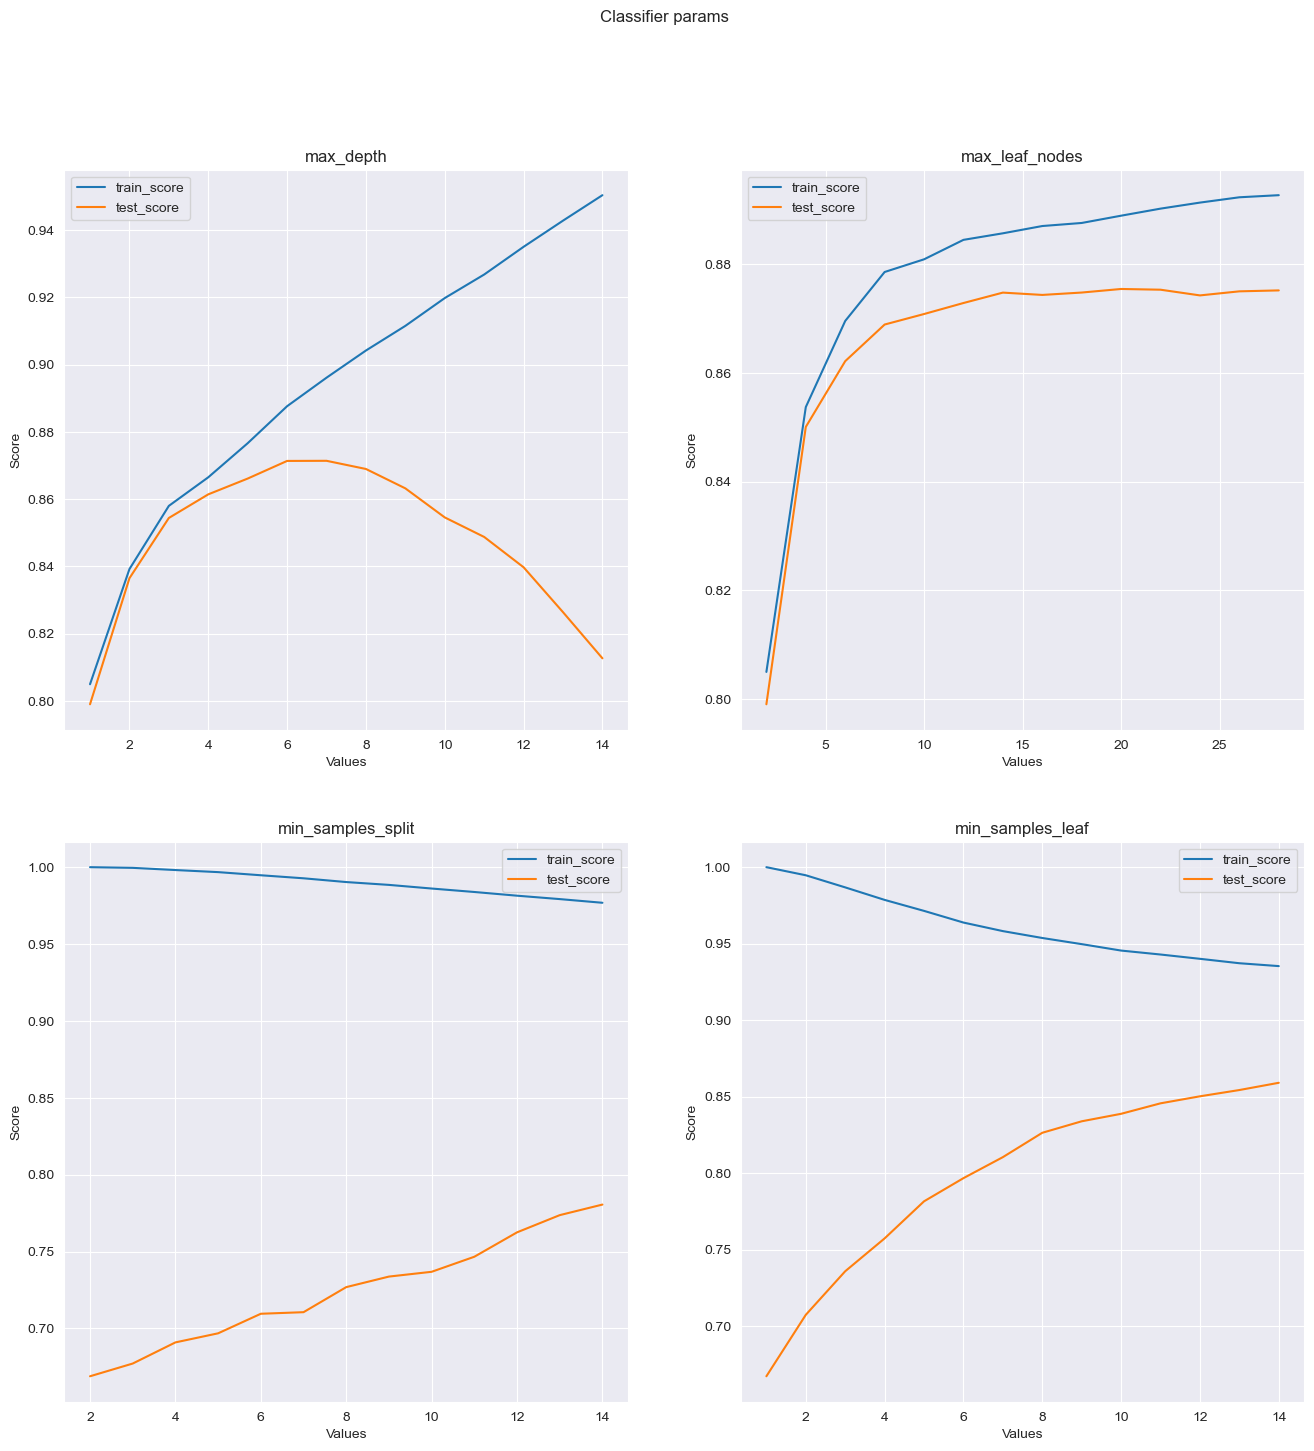

In [21]:
params = {
    'max_depth': [None] + list(range(1, 15)),
    'max_leaf_nodes': [None] + list(range(2, 30, 2)),
    'min_samples_split': list(range(2, 15)),
    'min_samples_leaf': list(range(1, 15)),
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
fig.suptitle("Classifier params")

for ax, (param, p_range) in zip(axs.flatten(), params.items()):
    train_vals = []
    test_vals = []
    for val in p_range:
        model = DecisionTreeClassifier(**{param: val})
        model.fit(x_train2, y_train2)
        train_vals.append(roc_auc_score(y_train2, model.predict_proba(x_train2)[:, 1]))
        test_vals.append(roc_auc_score(y_test2, model.predict_proba(x_test2)[:, 1]))
    ax.plot(p_range, train_vals, label="train_score")
    ax.plot(p_range, test_vals, label="test_score")
    ax.set_xlabel("Values")
    ax.set_ylabel("Score")
    ax.set_title(param)
    ax.legend()

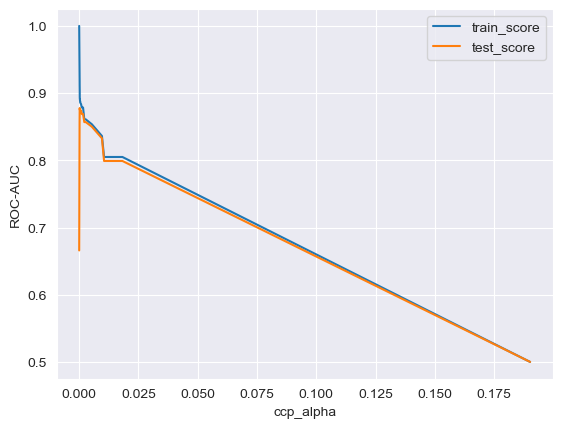

In [22]:
ccp_alphas = grid.best_estimator_.cost_complexity_pruning_path(x_train2, y_train2).ccp_alphas

test_scores = []
train_scores = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    model.fit(x_train2, y_train2)
    test_scores.append(roc_auc_score(y_test2, model.predict_proba(x_test2)[:, 1]))
    train_scores.append(roc_auc_score(y_train2, model.predict_proba(x_train2)[:, 1]))


plt.plot(ccp_alphas, train_scores, label="train_score")
plt.plot(ccp_alphas, test_scores, label="test_score")
plt.gca().set_ylabel("ROC-AUC")
plt.gca().set_xlabel("ccp_alpha")
plt.gca().set_title("Обрезка деревьев")
plt.gca().legend()


plt.show()

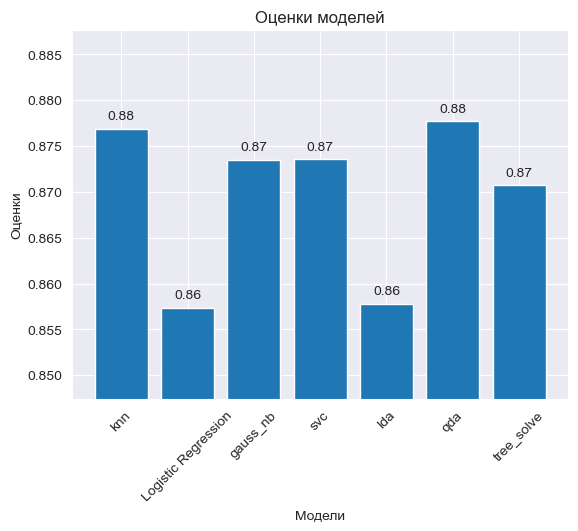

In [29]:
all_clfs_names = ['knn', 'Logistic Regression', 'gauss_nb', 'svc', 'lda', 'qda', 'tree_solve']
all_scores = [0.8768731484610126, 0.8573745275383273, 0.8735246623028627, 0.8735668990012495, 0.8577801962926002, 0.8777041309455519, roc_score]

plt.bar(all_clfs_names, all_scores)
plt.xticks(rotation=45)

plt.gca().set_title('ROC_AUC')
plt.gca().set_xlabel('Модели')
plt.gca().set_ylabel('Оценки')

for i, score in enumerate(all_scores):
    plt.gca().text(i, score+0.001, f'{score:.2f}', horizontalalignment='center')
plt.gca().set_ylim([min(all_scores) - 0.01, max(all_scores) + 0.01])

plt.show()

Линейная регрессия

Лучшие параметры: {'criterion': 'poisson', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'best'}
Оценка: 0.8534521424985617


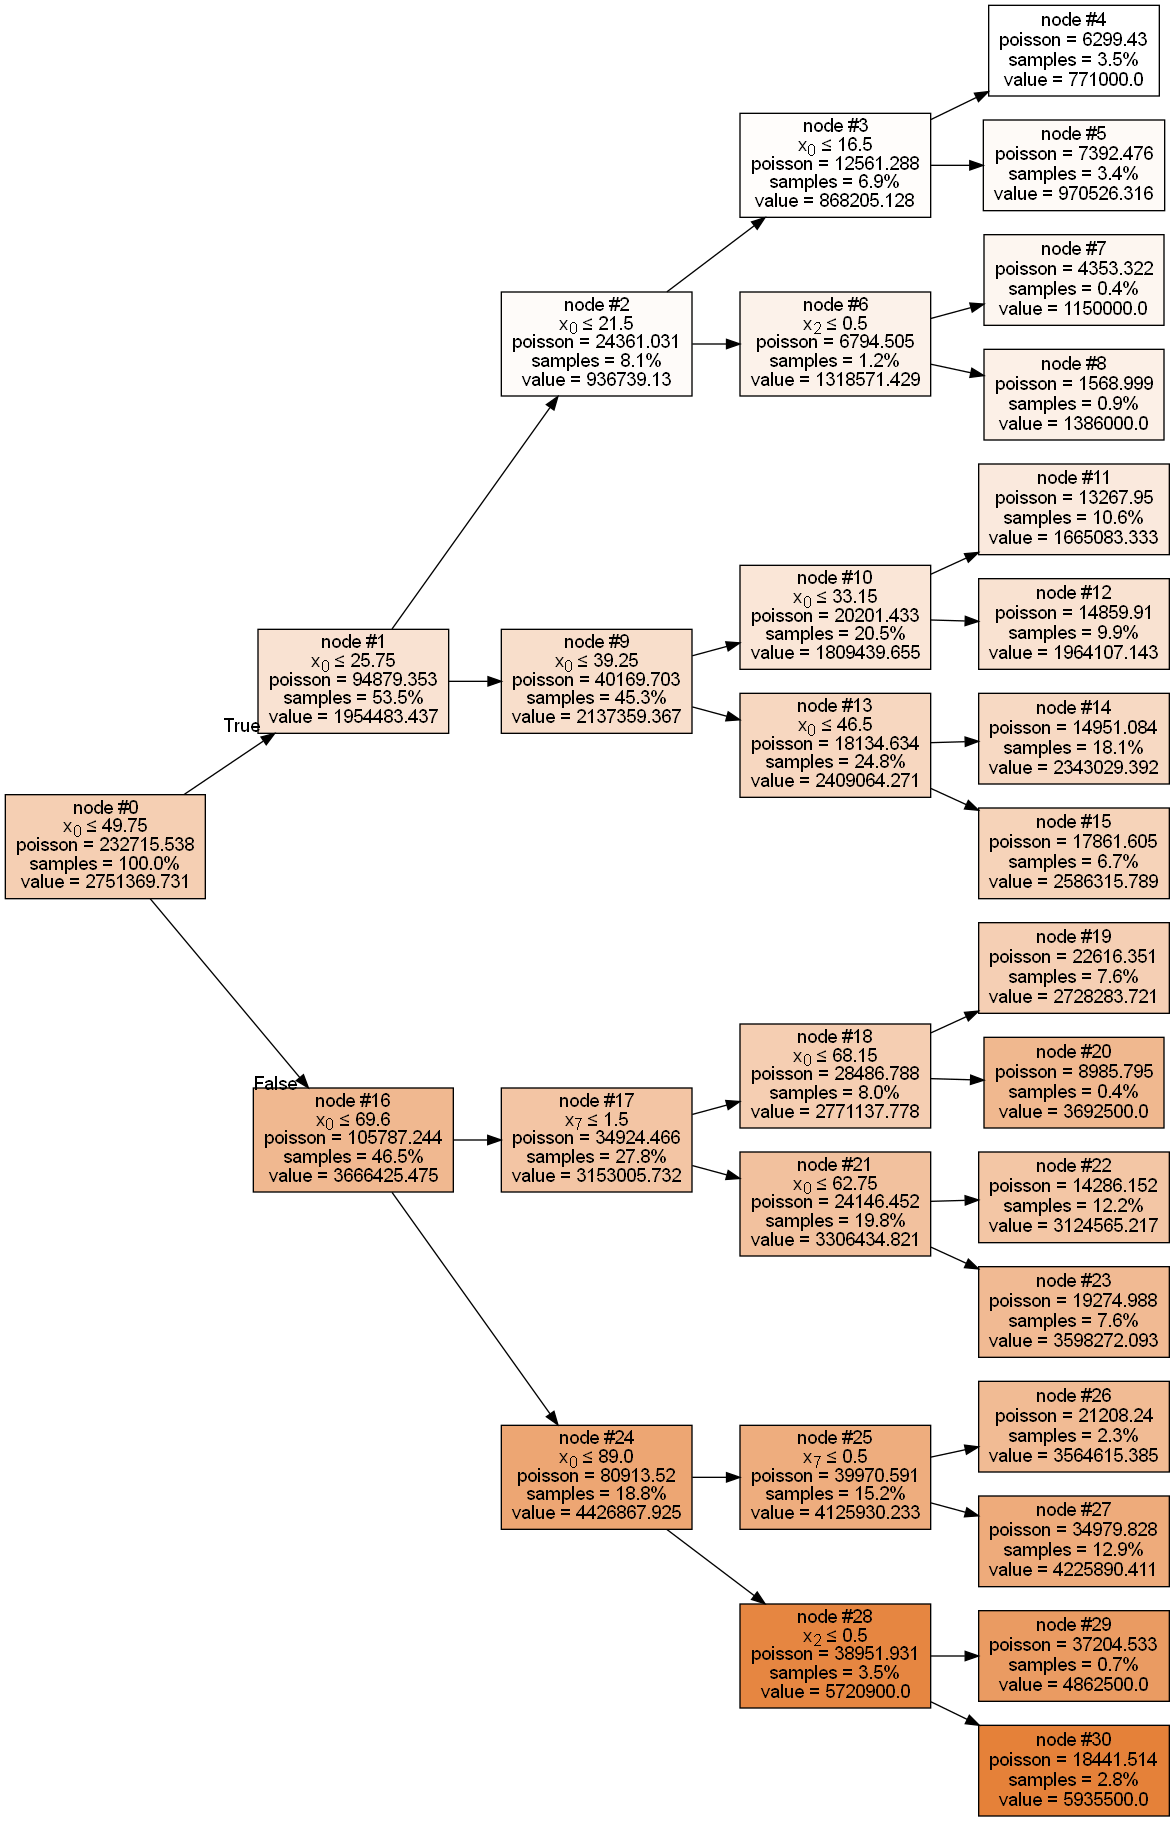

In [30]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3,
                                                        random_state=7)
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error',
                  'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid = GridSearchCV(DecisionTreeRegressor(), params, scoring='neg_mean_squared_error')
grid.fit(x_train3, y_train3)
score = grid.best_estimator_.score(x_test3, y_test3)
print(f'Лучшие параметры: {grid.best_params_}\n'
      f'Оценка: {score}')

# Строим дерево
export_graphviz(grid.best_estimator_, out_file='r_tree.dot',
                class_names=None, label='all', filled=True, impurity=True,
                node_ids=True,
                proportion=True, rotate=True,
                special_characters=True)

call(['dot', '-Tpng', 'r_tree.dot', '-o', 'r_tree.png'])
Image('r_tree.png')

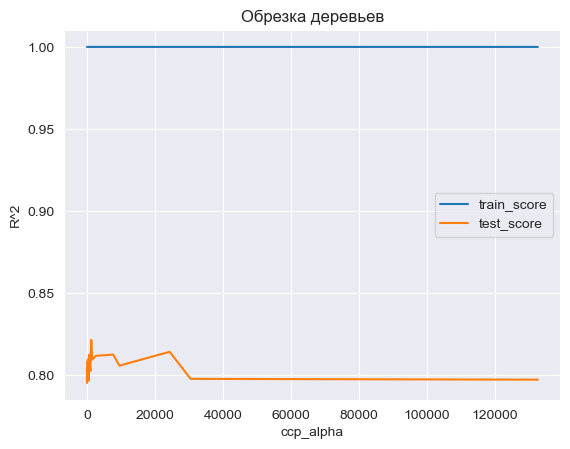

In [31]:
ccp_alphas = grid.best_estimator_.cost_complexity_pruning_path(x_train3, y_train3).ccp_alphas

test_scores = []
train_scores = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    model.fit(x_train3, y_train3)
    test_scores.append(model.score(x_test3, y_test3))
    train_scores.append(model.score(x_train3, y_train3))


plt.plot(ccp_alphas, train_scores, label="train_score")
plt.plot(ccp_alphas, test_scores, label="test_score")
plt.gca().set_ylabel("R^2")
plt.gca().set_xlabel("ccp_alpha")
plt.gca().set_title("Обрезка деревьев")
plt.gca().legend()


plt.show()

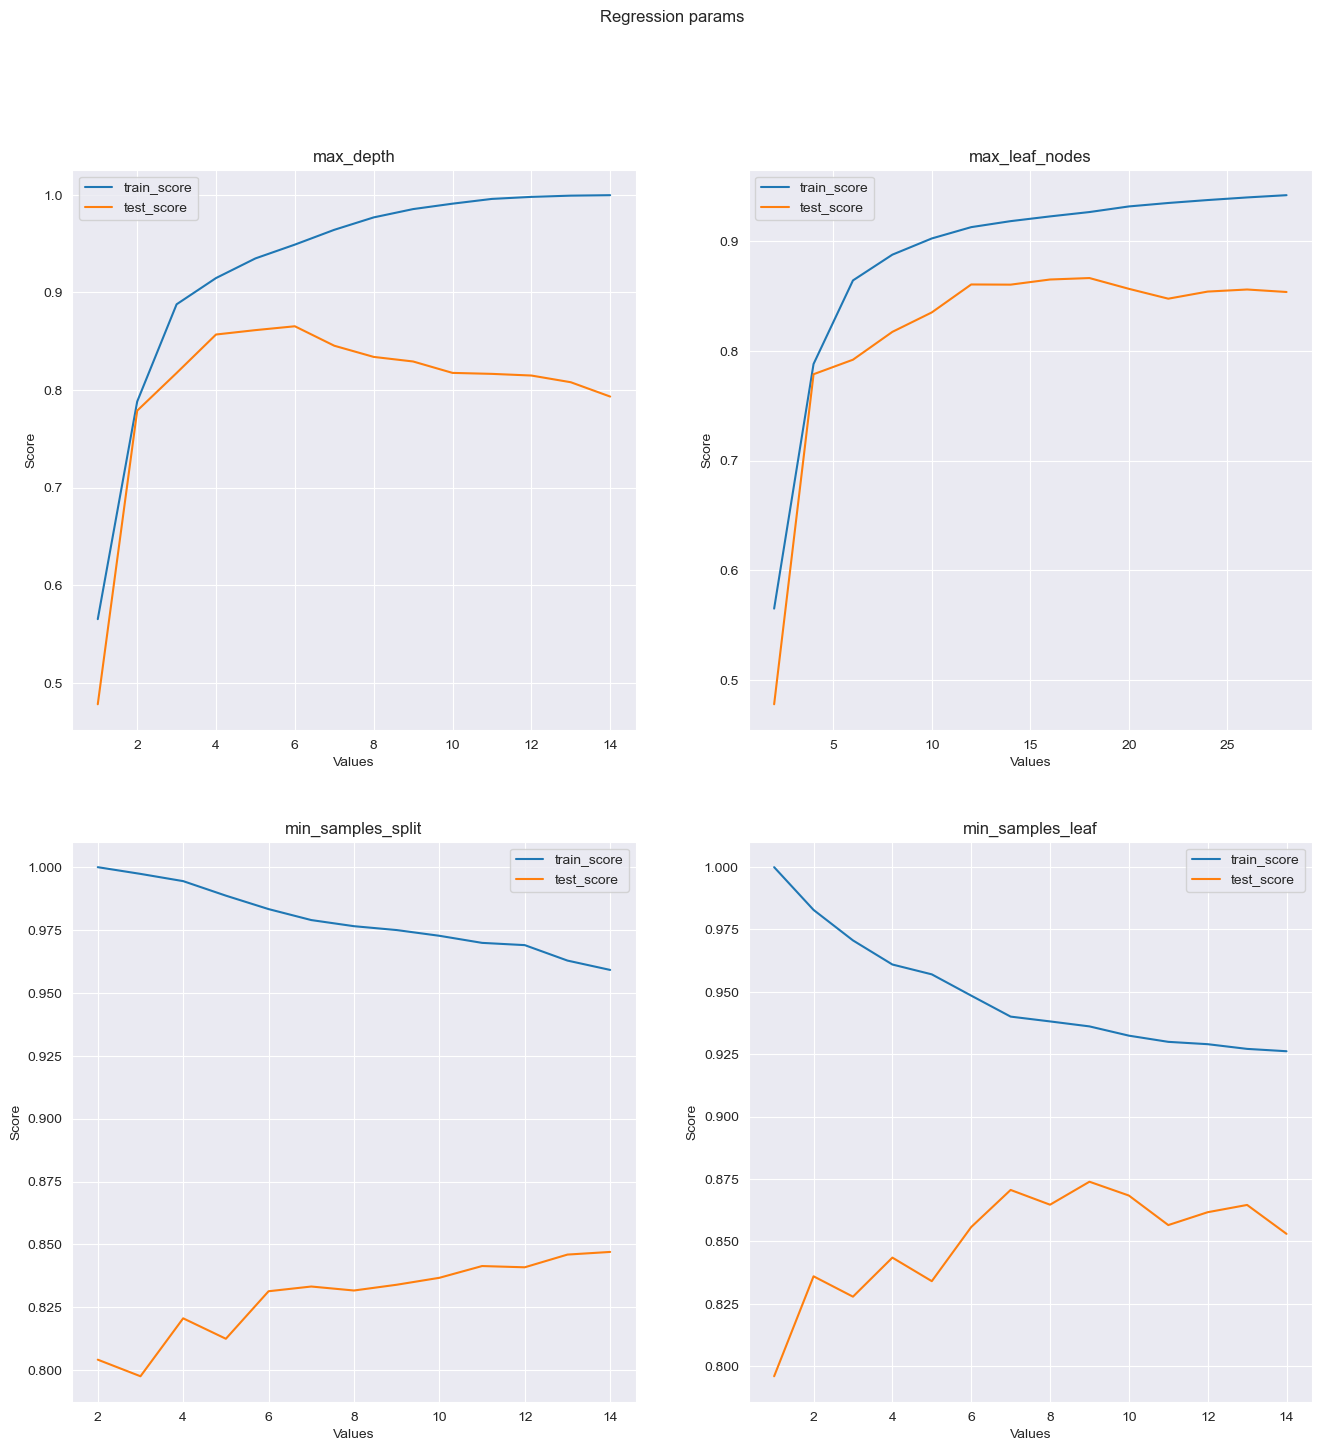

In [32]:
params = {
    'max_depth': [None] + list(range(1, 15)),
    'max_leaf_nodes': [None] + list(range(2, 30, 2)),
    'min_samples_split': list(range(2, 15)),
    'min_samples_leaf': list(range(1, 15)),
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
fig.suptitle("Regression params")

for ax, (param, p_range) in zip(axs.flatten(), params.items()):
    train_vals = []
    test_vals = []
    for val in p_range:
        model = DecisionTreeRegressor(**{param: val})
        model.fit(x_train3, y_train3)
        train_vals.append(model.score(x_train3, y_train3))
        test_vals.append(model.score(x_test3, y_test3))
    ax.plot(p_range, train_vals, label="train_score")
    ax.plot(p_range, test_vals, label="test_score")
    ax.set_xlabel("Values")
    ax.set_ylabel("Score")
    ax.set_title(param)
    ax.legend()

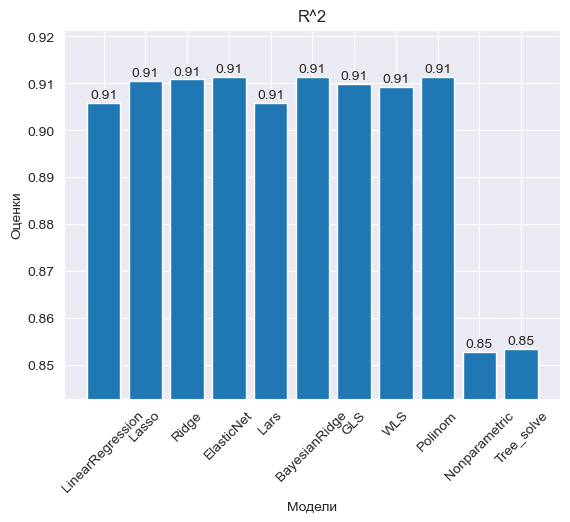

In [33]:
all_clfs_names = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'Lars', 'BayesianRidge', 'GLS', 'WLS', 'Polinom', 'Nonparametric', 'Tree_solve']
all_scores = [0.9057608593460179, 0.9105815321255123, 0.9108238226706903, 0.9114448335602456, 0.9057608593460179, 0.9114271999548514, 0.9097671607768908, 0.9092469697987928, 0.9114001914893821, 0.8527314851041514, score]

plt.bar(all_clfs_names, all_scores)
plt.xticks(rotation=45)

plt.gca().set_title('R^2')
plt.gca().set_xlabel('Модели')
plt.gca().set_ylabel('Оценки')

for i, score in enumerate(all_scores):
    plt.gca().text(i, score+0.001, f'{score:.2f}', horizontalalignment='center')
plt.gca().set_ylim([min(all_scores) - 0.01, max(all_scores) + 0.01])

plt.show()